# Clustering - Find Best K

## Run following clustering algorithms for given fonts
1. K-Means
1. Spectral Clustering
1. Agglomerative
1. Mapper - from homework problem - if time permits

### Turn Warnings Off

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Imports and Globals

In [2]:
from collections import namedtuple

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

import font_utils.load_font as LF
import font_utils.upper_lower_numerals as ULN
import plot_utils.plot_font as PU
import plot_utils.plot_clusters as PLOT_CLUST
import sci_kit_learn_utils.clustering as CLUST

## Named Tuples
1. Font Selection
    1. Selected Font
    1. Font Variant Name
    1. Font Style
1. Plot Configuration
    1. Cluster Id
    1. Color
    1. Class Name

In [3]:
FontSelection = namedtuple('FontSelection', ['name', 'variant', 'style'])

FONTS = [
    FontSelection('garamond', 'GARAMOND', 'Old Style'),
    FontSelection('baskerville', 'BASKERVILLE OLD FACE', 'Transitional'),
    FontSelection('bodoni', 'BODONI', 'Modern'),
    FontSelection('arial', 'ARIAL', 'Sans Serif')
]

### Prepare Data
1. Get Upper/Lower/Numeral ASCII Code object
1. Load raw font data from disk
    1. Contains multiple faces for font
    1. Contains italic faces for font
    1. Contains normal weight and bold weight font
    1. Select only normal and bold weight
1. Capture array of lables
1. Pack Dimensionally Reduced DataFrames into list
1. Create ClusterUtility object
1. Create PlotCluster object

In [4]:
uln = ULN.UpperLowerNumerals.get_ascii_codes()

lf = LF.LoadFont('garamond')
font_dict = lf.get_trimmed_font()
font_df = font_dict['GARAMOND']['df']

LABEL_AR = None

raw_dfs = list()

for i in range(font_dict['GARAMOND']['min_char_count']):
        t_df = pd.DataFrame(data=[font_df.loc[font_df.m_label == x].iloc[i] for x in uln])
        
        if i==0:
            LABEL_AR = [chr(x) for x in t_df.m_label]
            
        t_df = t_df.drop(columns=['m_label'])
        t_df = t_df-t_df.mean(axis=0)
        
        pca = PCA(n_components=20)
        pca.fit(t_df)
        
        x = t_df.dot(pca.components_[0])
        y = t_df.dot(pca.components_[1])
        
        cluster_df = pd.DataFrame([x.transpose(), y.transpose()]).transpose()
        cluster_df.columns=['x','y']
        
        raw_dfs.append(cluster_df)
        
clust = CLUST.ClusterUtils()
plot_clust = PLOT_CLUST.PlotClusters(LABEL_AR)

### K-Means : Optimum Cluster Count

Normal Weight Best Cluster Count Elbow


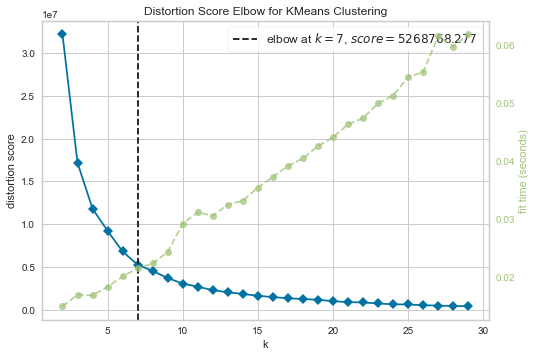

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
print(f'Normal Weight Best Cluster Count Elbow')

k_model = KMeans()
k_visualizer = KElbowVisualizer(k_model, k=(2,30), timings=True)
k_visualizer.fit(raw_dfs[0])
k_visualizer.show()

Bold Weight Best Cluster Count Elbow


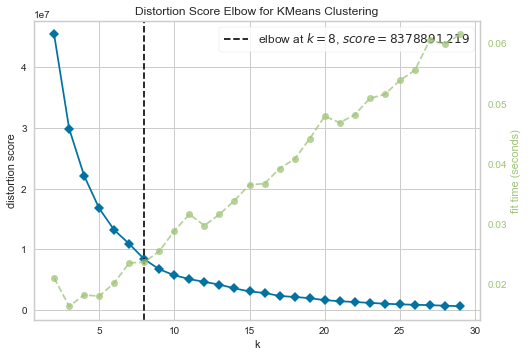

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
print(f'Bold Weight Best Cluster Count Elbow')

k_model = KMeans()
k_visualizer = KElbowVisualizer(k_model, k=(2,30), timings=True)
k_visualizer.fit(raw_dfs[1])
k_visualizer.show()

Normal Weight Best Cluster Count Silhouette


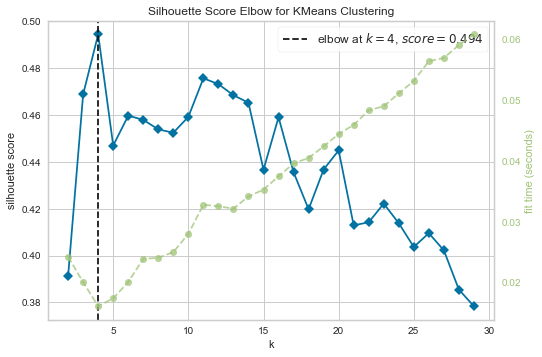

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [7]:
print(f'Normal Weight Best Cluster Count Silhouette')

k_model = KMeans()
k_visualizer = KElbowVisualizer(k_model, k=(2,30), metric='silhouette')
k_visualizer.fit(raw_dfs[0])
k_visualizer.show()

Bold Weight Best Cluster Count Silhouette


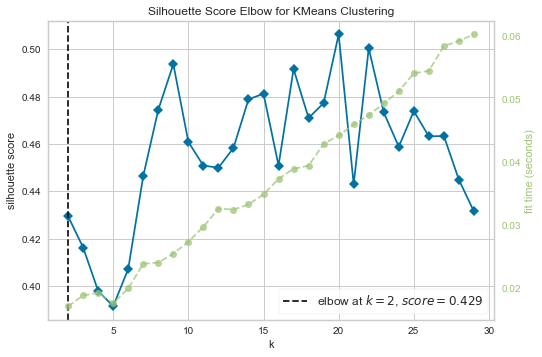

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [8]:
print(f'Bold Weight Best Cluster Count Silhouette')

k_model = KMeans()
k_visualizer = KElbowVisualizer(k_model, k=(2,30), metric='silhouette')
k_visualizer.fit(raw_dfs[1])
k_visualizer.show()

Normal Weight Best Cluster Count Calinski Harabasz


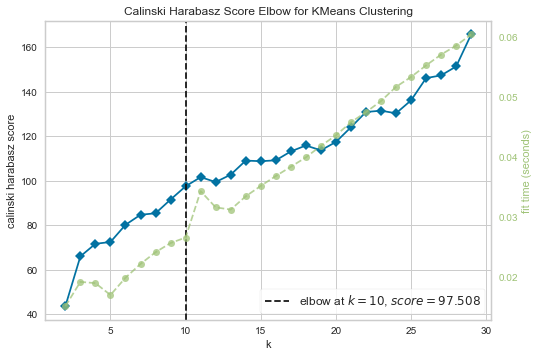

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [9]:
print(f'Normal Weight Best Cluster Count Calinski Harabasz')

k_model = KMeans()
k_visualizer = KElbowVisualizer(k_model, k=(2,30), metric='calinski_harabasz')
k_visualizer.fit(raw_dfs[0])
k_visualizer.show()

Bold Weight Best Cluster Count Calinski Harabasz


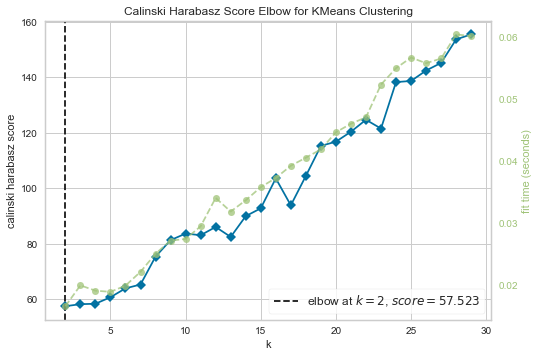

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [10]:
print(f'Bold Weight Best Cluster Count Calinski Harabasz')

k_model = KMeans()
k_visualizer = KElbowVisualizer(k_model, k=(2,30), metric='calinski_harabasz')
k_visualizer.fit(raw_dfs[1])
k_visualizer.show()

### Spectral : Optimum Cluster Count

Normal Weight Best Cluster Count Elbow


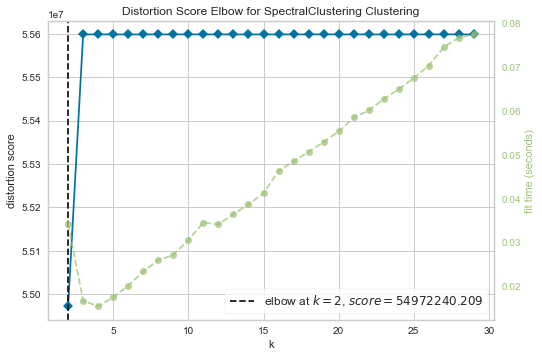

<AxesSubplot:title={'center':'Distortion Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
# Graph not fully connected creating lots of warnings

print(f'Normal Weight Best Cluster Count Elbow')

s_model = SpectralClustering()
s_visualizer = KElbowVisualizer(s_model, k=(2,30), timings=True)
s_visualizer.fit(raw_dfs[0])
s_visualizer.show()

Normal Weight Best Cluster Count Elbow


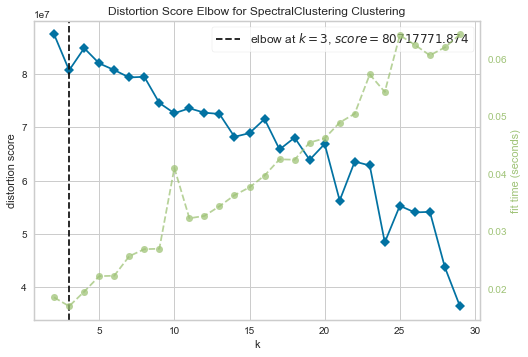

<AxesSubplot:title={'center':'Distortion Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
print(f'Normal Weight Best Cluster Count Elbow')

s_model = SpectralClustering()
s_visualizer = KElbowVisualizer(s_model, k=(2,30), timings=True)
s_visualizer.fit(raw_dfs[1])
s_visualizer.show()

Normal Weight Best Cluster Count Silhouette k=1 (produces error)
Bold Weight Best Cluster Count Silhouette


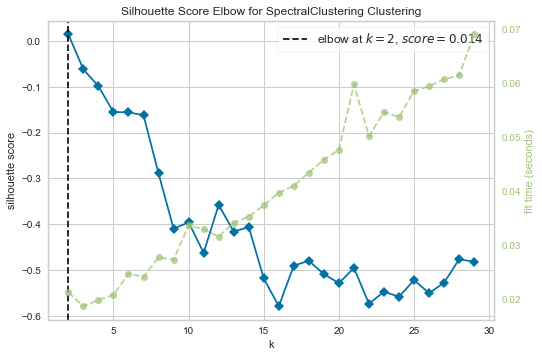

<AxesSubplot:title={'center':'Silhouette Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [13]:
print(f'Normal Weight Best Cluster Count Silhouette k=1 (produces error)')
print(f'Bold Weight Best Cluster Count Silhouette')

s_model = SpectralClustering()
s_visualizer = KElbowVisualizer(s_model, k=(2,30), metric='silhouette')
s_visualizer.fit(raw_dfs[1])
s_visualizer.show()

Normal Weight Best Cluster Count Calinski Harabasz k=1 (produces error)
Bold Weight Best Cluster Count Calinski Harabasz


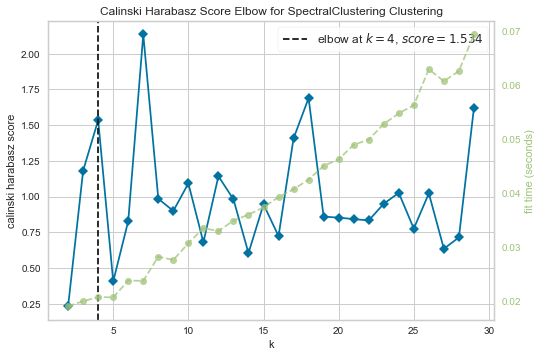

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [14]:
print(f'Normal Weight Best Cluster Count Calinski Harabasz k=1 (produces error)')
print(f'Bold Weight Best Cluster Count Calinski Harabasz')

s_model = SpectralClustering()
s_visualizer = KElbowVisualizer(s_model, k=(2,30), metric='calinski_harabasz')
s_visualizer.fit(raw_dfs[1])
s_visualizer.show()

### Agglomerative: Optimum Cluster Count

Normal Weight Best Cluster Count Elbow


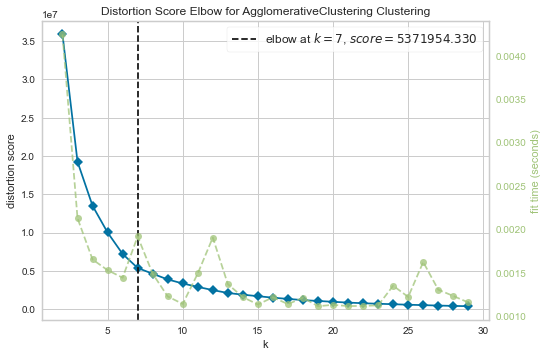

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
print(f'Normal Weight Best Cluster Count Elbow')

a_model = AgglomerativeClustering()
a_visualizer = KElbowVisualizer(a_model, k=(2,30), timings=True)
a_visualizer.fit(raw_dfs[0])
a_visualizer.show()

Bold Weight Best Cluster Count Elbow


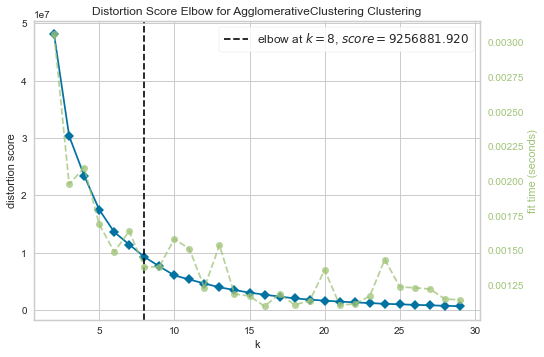

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
print(f'Bold Weight Best Cluster Count Elbow')

a_model = AgglomerativeClustering()
a_visualizer = KElbowVisualizer(a_model, k=(2,30), timings=True)
a_visualizer.fit(raw_dfs[1])
a_visualizer.show()

Normal Weight Best Cluster Count Silhouette


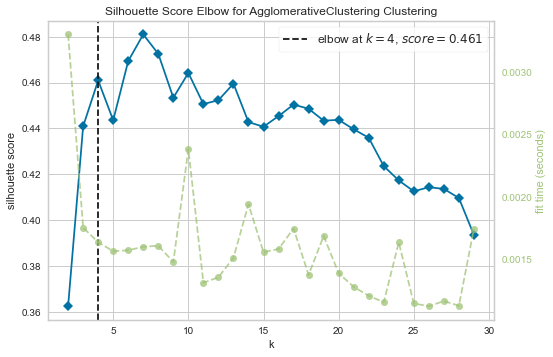

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [17]:
print(f'Normal Weight Best Cluster Count Silhouette')

a_model = AgglomerativeClustering()
a_visualizer = KElbowVisualizer(a_model, k=(2,30), metric='silhouette')
a_visualizer.fit(raw_dfs[0])
a_visualizer.show()

Bold Weight Best Cluster Count Silhouette


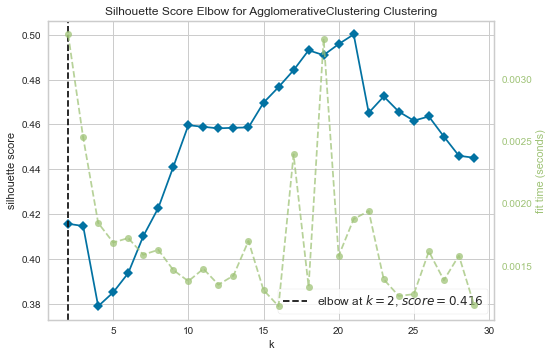

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [18]:
print(f'Bold Weight Best Cluster Count Silhouette')

a_model = AgglomerativeClustering()
a_visualizer = KElbowVisualizer(a_model, k=(2,30), metric='silhouette')
a_visualizer.fit(raw_dfs[1])
a_visualizer.show()

Normal Weight Best Cluster Count Calinski Harabasz


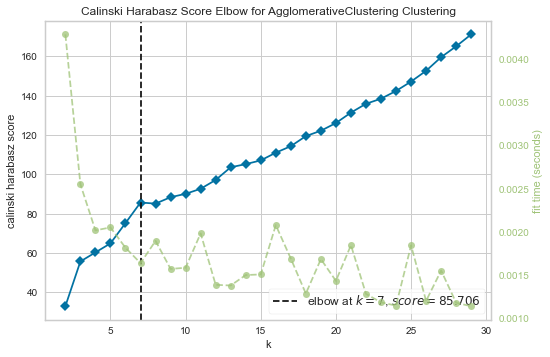

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [19]:
print(f'Normal Weight Best Cluster Count Calinski Harabasz')

a_model = AgglomerativeClustering()
a_visualizer = KElbowVisualizer(a_model, k=(2,30), metric='calinski_harabasz')
a_visualizer.fit(raw_dfs[0])
a_visualizer.show()

Bold Weight Best Cluster Count Calinski Harabasz


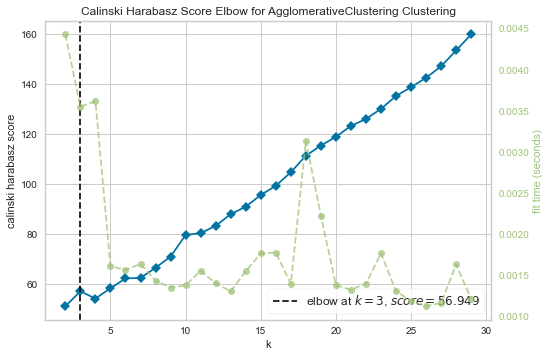

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [20]:
print(f'Bold Weight Best Cluster Count Calinski Harabasz')

a_model = AgglomerativeClustering()
a_visualizer = KElbowVisualizer(a_model, k=(2,30), metric='calinski_harabasz')
a_visualizer.fit(raw_dfs[1])
a_visualizer.show()